In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Dassault system salaries.csv")
df.head()

,Position,Nature,Salary,Base Salary,Bonus
0,Software Engineer,NaN,49 500 €,42 500 €,9 250 €
1,Ingénieur,STAGE,16 478 €,16 426 €,2 054 €
2,Stagiaire,STAGE,16 098 €,16 098 €,0
3,Ingénieur Développement Logiciel,NaN,50 800 €,44 845 €,8 829 €
4,Ingénieur R&D,NaN,50 000 €,43 397 €,8 971 €


In [3]:
df.shape

(800, 5)

In [4]:
df.describe()

,Position,Nature,Salary,Base Salary,Bonus
count,800,286,800,800,800
unique,701,4,369,330,131
top,Software Engineer,STAGE,48 k € - 52 k €,16 k € - 17 k €,0
freq,4,192,31,27,547


# Dropping positions with unuseful nature

In [5]:
df.drop(df[df.Nature=='STAGE'].index, inplace=True)
df.drop(df[df.Nature=='APPRENTI'].index, inplace=True)
df.drop(df[df.Nature=='STAGIAIRE'].index, inplace=True)
df.drop(df[df.Nature=='INTÉRIMAIRE'].index, inplace=True)
df.shape

(514, 5)

In [6]:
df.describe()

,Position,Nature,Salary,Base Salary,Bonus
count,514,0,514,514,514
unique,507,0,294,259,116
top,Market Analyst,NaN,48 k € - 52 k €,48 k € - 52 k €,0
freq,2,NaN,31,24,304


# Nature of position is now permanent

In [7]:
if 'Nature' in df: df.drop('Nature', axis=1, inplace=True)
df.head(2)
df.shape

(514, 4)

# Droping forign currencies

In [8]:
df.drop(df[~df['Salary'].str.contains('€')].index, inplace=True)
df.reset_index(inplace=True, drop=True)
df.shape

(508, 4)

# Formating salaries

In [9]:
def formating(value):
    if '-' in str(value):
        return int((int(str(value).split('-')[0].replace('\u202f', '').replace(' €', '').replace(' k','000').replace(' M','000000').strip())
                +int(str(value).split('-')[1].replace('\u202f', '').replace(' €', '').replace(' k','000').replace(' M','000000').strip()))/2)
    else: 
        return int(str(value).replace('\u202f', '').replace(' €', '').replace(' k','000').replace(' M','000000').strip())

In [10]:
df.loc[:,'Salary':]=df.loc[:,'Salary':].applymap(formating)
df.head()


,Position,Salary,Base Salary,Bonus
0,Software Engineer,49500,42500,9250
1,Ingénieur Développement Logiciel,50800,44845,8829
2,Ingénieur R&D,50000,43397,8971
3,Ingénieur,40000,39431,9142
4,Data Scientist,49680,43895,8574


In [11]:
df.sort_values(by='Salary', inplace=True)
df.reset_index(inplace=True, drop=True)
df.shape

(508, 4)

In [12]:
for col in df.columns[1:]:
    df[col]=df[col].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Position     508 non-null    object
 1   Salary       508 non-null    int32 
 2   Base Salary  508 non-null    int32 
 3   Bonus        508 non-null    int32 
dtypes: int32(3), object(1)
memory usage: 10.0+ KB


# Filtring

In [13]:
filters=['Manager','sales','vendeur', 'Senior','human',
          'Consultant', 'Intern', 'Internship', 'commercial',
            'director', 'directeur', 'lead', 'marketing', 'chef']
df.drop(df[(df.loc[:,'Salary']<30000) | (df.loc[:,'Salary']>70000) | (df.loc[:,'Position'].str.contains('|'.join(filters), case=False))].index, inplace=True)
df.shape
df.reset_index(inplace=True, drop=True)

In [14]:
df2=pd.DataFrame()
list_of_filters=[["Engineer", "ingénieur"],['Solution'],['Archi'],["Soft", "logi"]]
for filters in list_of_filters:
    tmp=df[df.loc[:,'Position'].str.contains('|'.join(filters), case=False)].copy()
    tmp['Position']=filters[0]
    df2=pd.concat([df2,tmp],axis=0, ignore_index=True)


In [15]:
df2.describe()

,Salary,Base Salary,Bonus
count,111.000000,111.000000,111.000000
mean,50490.612613,46267.648649,5091.702703
std,7019.657648,6645.868478,4464.685416
min,36500.000000,35500.000000,0.000000
25%,47000.000000,41000.000000,0.000000
50%,50000.000000,44819.000000,6743.000000
75%,53000.000000,50000.000000,8985.500000
max,69000.000000,69000.000000,13186.000000


In [16]:
df2.groupby('Position').describe().transpose()

Position                  Archi      Engineer          Soft      Solution
Salary      count     10.000000     67.000000     28.000000      6.000000
            mean   54530.900000  50363.895522  49678.357143  48962.333333
            std     8304.020130   7525.134720   5102.188232   5702.710993
            min    45500.000000  36500.000000  40500.000000  39000.000000
            25%    47875.000000  46250.000000  47000.000000  47625.000000
            50%    52000.000000  50000.000000  49750.000000  49500.000000
            75%    60318.500000  55000.000000  51000.000000  52500.000000
            max    69000.000000  69000.000000  65535.000000  55274.000000
Base Salary count     10.000000     67.000000     28.000000      6.000000
            mean   52675.200000  45857.552239  44883.964286  46625.000000
            std     8124.254178   6748.111552   4786.283956   5730.946693
            min    43500.000000  35500.000000  40383.000000  39500.000000
            25%    46750.000000  41000.000000  41000.000000  41625.000000
            50%    50875.000000  44000.000000  42750.000000  48500.000000
            75%    57251.500000  49500.000000  48125.000000  51062.500000
            max    69000.000000  69000.000000  59002.000000  52000.000000
Bonus       count     10.000000     67.000000     28.000000      6.000000
            mean    2810.800000   5275.313433   5750.607143   3768.000000
            std     4113.685798   4683.414661   3978.559700   4204.062797
            min        0.000000      0.000000      0.000000      0.000000
            25%        0.000000      0.000000      0.000000      0.000000
            50%        0.000000   7304.000000   8000.000000   3054.000000
            75%     5331.000000   9049.500000   8871.750000   7527.000000
            max    11000.000000  13186.000000  11000.000000   8500.000000

# Basic Ploting

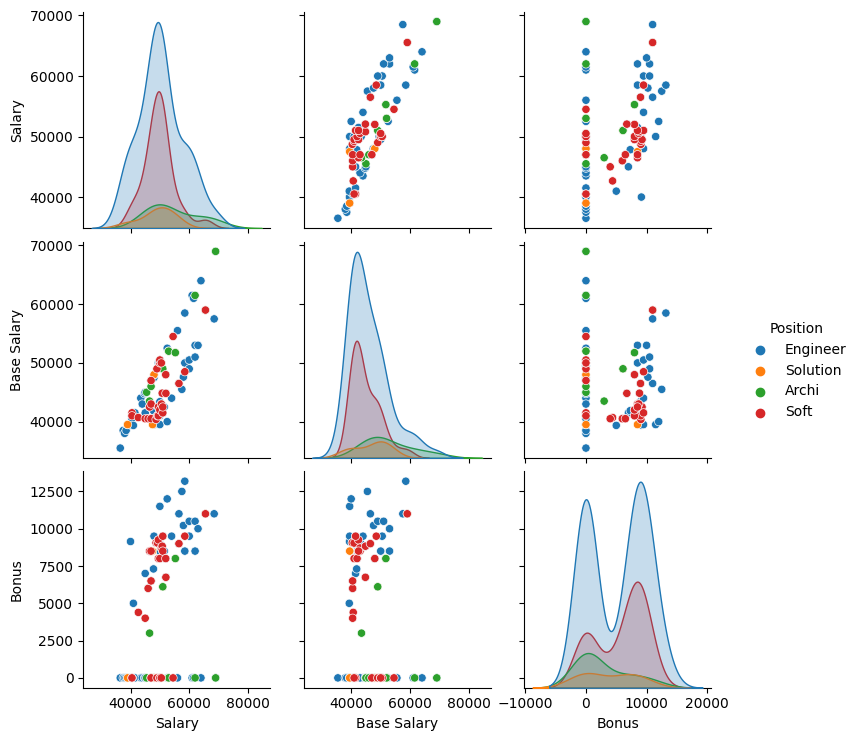

In [17]:
sns.pairplot(df2, hue='Position')
plt.show()

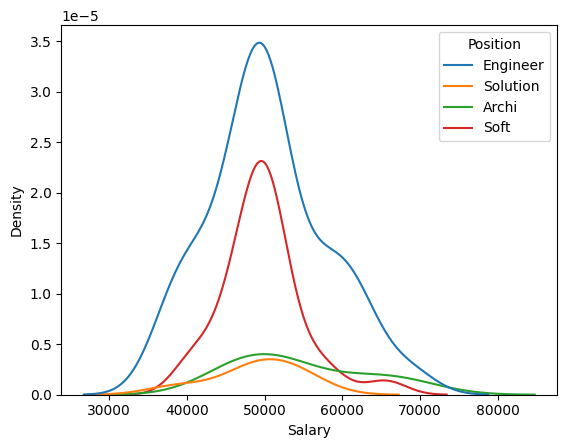

In [18]:
sns.kdeplot(data=df2, x='Salary', hue='Position')
plt.show()

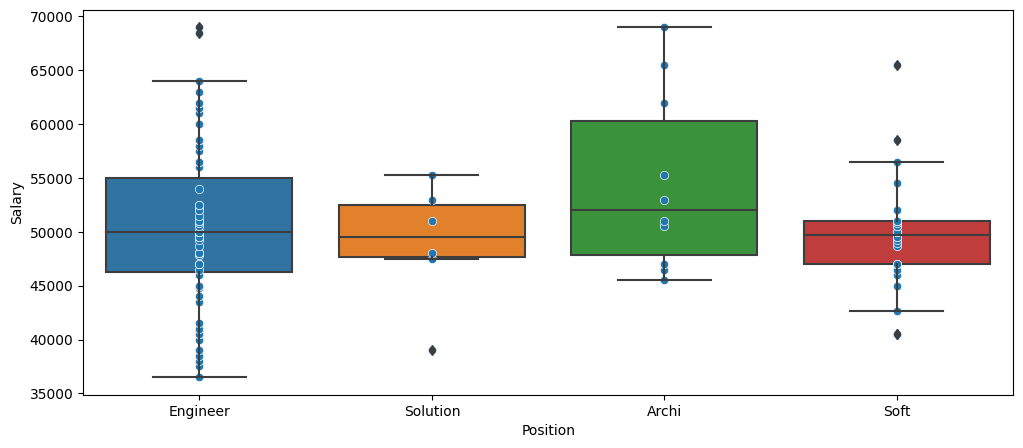

In [19]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df2, x='Position', y='Salary')
sns.scatterplot(data=df2, x='Position', y='Salary')
plt.show()

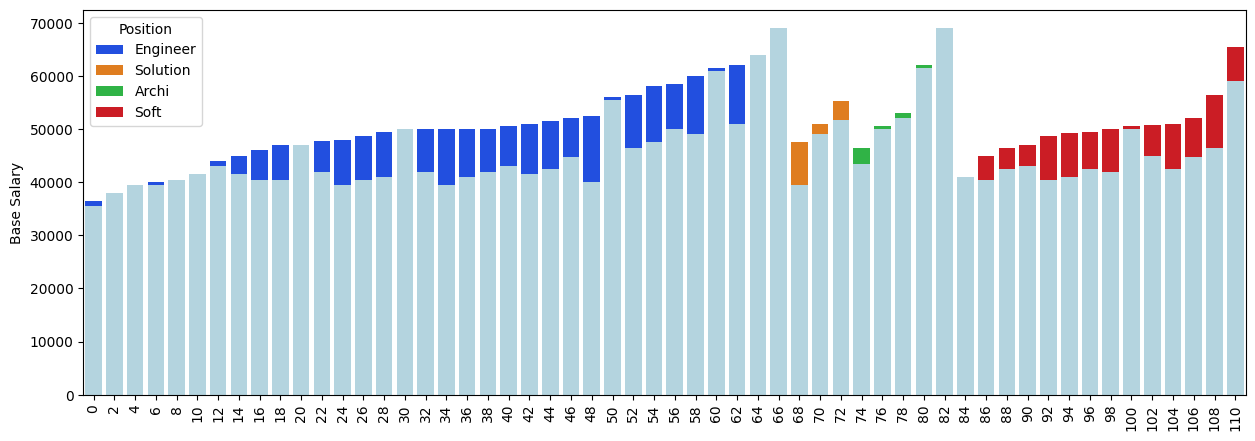

In [20]:
plt.figure(figsize=(15,5))
step=2

sns.barplot(x=df2.iloc[::step].index,  y="Salary", data=df2.iloc[::step], hue='Position', palette='bright', dodge=False)
sns.barplot(x=df2.iloc[::step].index,  y="Base Salary", data=df2.iloc[::step], color='lightblue' )
plt.xticks(rotation=90)
plt.show()